# LAB5: Ordinary Differential Equation - Initial Value Problems

In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import math


def errors(true_values, test_values):
    m = len(true_values)
    mse = 0
    mae = 0
    mx = 0
    for i in range(m):
        mse += (true_values[i] - test_values[i]) ** 2
        mae += abs(true_values[i] - test_values[i])
        mx = max(abs(true_values[i] - test_values[i]), mx)
    mse = math.sqrt(mse / m / (m - 1))
    mae /= m
    print(f"MSE: {mse}, MAE: {mae}, MAX: {mx}")


def tester(x_points, true_points, test_points, label):
    plt.figure(figsize=(17, 8))
    plt.plot(x_points, true_points)
    plt.plot(x_points, test_points)
    plt.legend([label, 'Ideal'])
    plt.ylabel('u')
    plt.xlabel('x')
    plt.grid()

    errors(true_points, test_points)

In [2]:
var('x u v')
fu = v
fv = (1/(1 + x**2))*(-x*v + u + (3 - 2*x + 4*x**2)*exp(-2*x))  
fv

(u - v*x + (4*x**2 - 2*x + 3)*exp(-2*x))/(x**2 + 1)

In [3]:
a = 0
b = 1
u0 = 2
v0 = -2
solution = sqrt(1 + x**2) + exp(-2*x)
solution

sqrt(x**2 + 1) + exp(-2*x)

In [4]:
n = 20
h = (b - a) / (n - 1)

p_x = []
for i in range(n):
    p_x.append(a + i*h)

solution_points = []
for i in range(n):
    solution_points.append(solution.evalf(subs = {x: p_x[i]}))


In [5]:
def euler(p_x):
    u_n = [u0]
    prev_v = v0
    for i in range(n - 1):
        u_n.append(u_n[-1] + h * fu.subs({v: prev_v}))
        prev_v += h * fv.subs({x:p_x[i], v:prev_v, u:u_n[-2]})
    return u_n

In [6]:
def runge_kutta(p_x):
    p_u = [u0]
    prev_v = v0
    p_v = [v0]
    h_ = p_x[1] - p_x[0]
    for i in range(len(p_x) - 1):
        prev_u = p_u[-1]

        k1_u = fu.subs(v, prev_v)
        k1_v = fv.subs([(x, p_x[i]), (v, prev_v), (u, prev_u)])

        k2_u = fu.subs(v, prev_v + h_ * k1_v / 2)
        k2_v = fv.subs([(x, p_x[i] + h_ / 2), (v, prev_v + h_ * k1_v / 2), (u, prev_u + h_ * k1_u / 2)])

        k3_u = fu.subs(v, prev_v + h_ * k2_v / 2)
        k3_v = fv.subs([(x, p_x[i] + h_ / 2), (v, prev_v + h_ * k2_v / 2), (u, prev_u + h_ * k2_u / 2)])

        k4_u = fu.subs(v, prev_v + h_ * k3_v)
        k4_v = fv.subs([(x, p_x[i] + h_), (v, prev_v + h_ * k3_v), (u, prev_u + h_ * k3_u)])

        prev_v += h_ / 6 * (k1_v + 2 * k2_v + 2 * k3_v + k4_v)
        p_v.append(prev_v)
        p_u.append(prev_u + h_ / 6 * (k1_u + 2 * k2_u + 2 * k3_u + k4_u))

    return (p_u, p_v)

In [7]:
def adams(p_x):
    p_u, p_v = runge_kutta(p_x[:3])

    for i in range(2, len(p_x) - 1):
        k1_u = fu.subs(v, p_v[-1])
        k1_v = fv.subs([(x, p_x[i]), (v, p_v[-1]), (u, p_u[-1])])

        k2_u = fu.subs(v, p_v[-2])
        k2_v = fv.subs([(x, p_x[i - 1]), (v, p_v[-2]), (u, p_u[-2])])

        k3_u = fu.subs(v, p_v[-3])
        k3_v = fv.subs([(x, p_x[i - 2]), (v, p_v[-3]), (u, p_u[-3])])

        p_u.append(p_u[-1] + h / 12 * (23 * k1_u - 16 * k2_u + 5 * k3_u))
        p_v.append(p_v[-1] + h / 12 * (23 * k1_v - 16 * k2_v + 5 * k3_v))

    return p_u

In [8]:
euler_points = euler(p_x)
runge_kutta_points = runge_kutta(p_x)[0]
adams_points = adams(p_x)

MSE: 0.005062769644412388, MAE: 0.0206970930040952, MAX: 0.0285147292336994


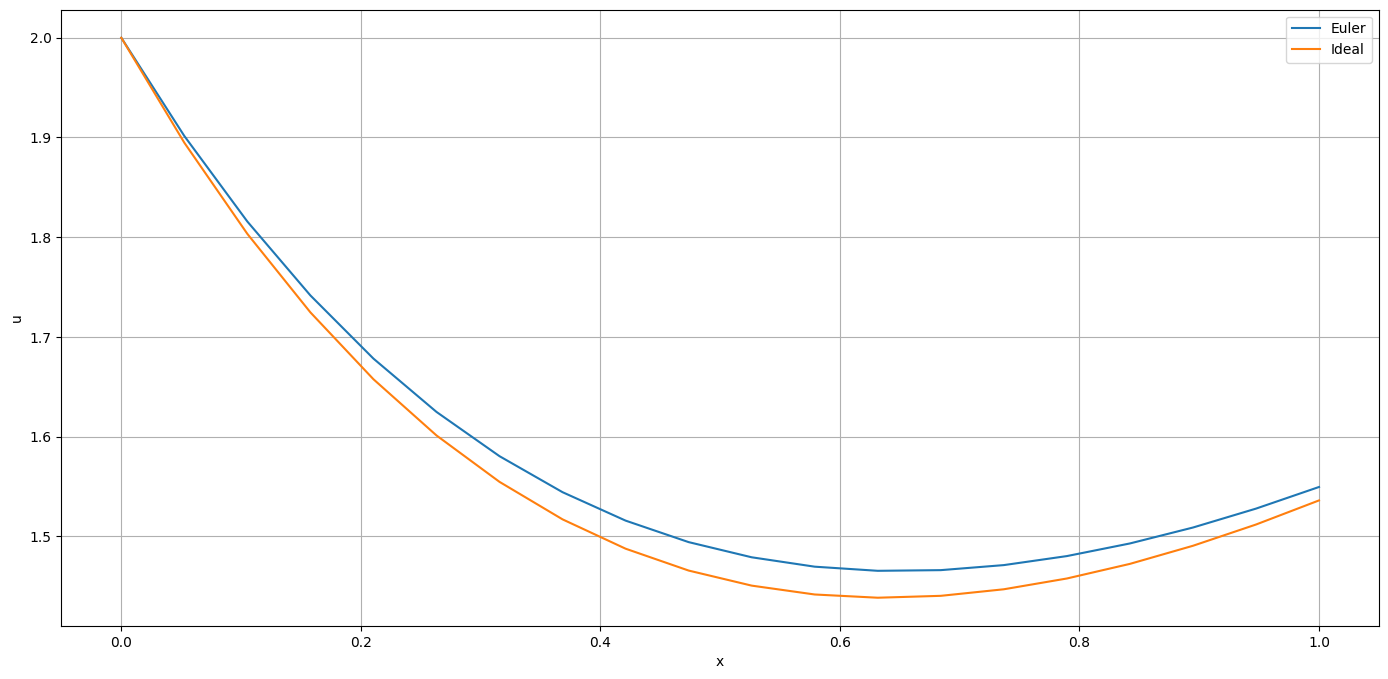

In [9]:
tester(p_x, solution_points, euler_points, "Euler")

MSE: 5.190057547838702e-08, MAE: 2.06238772326728E-7, MAX: 3.18666862897388E-7


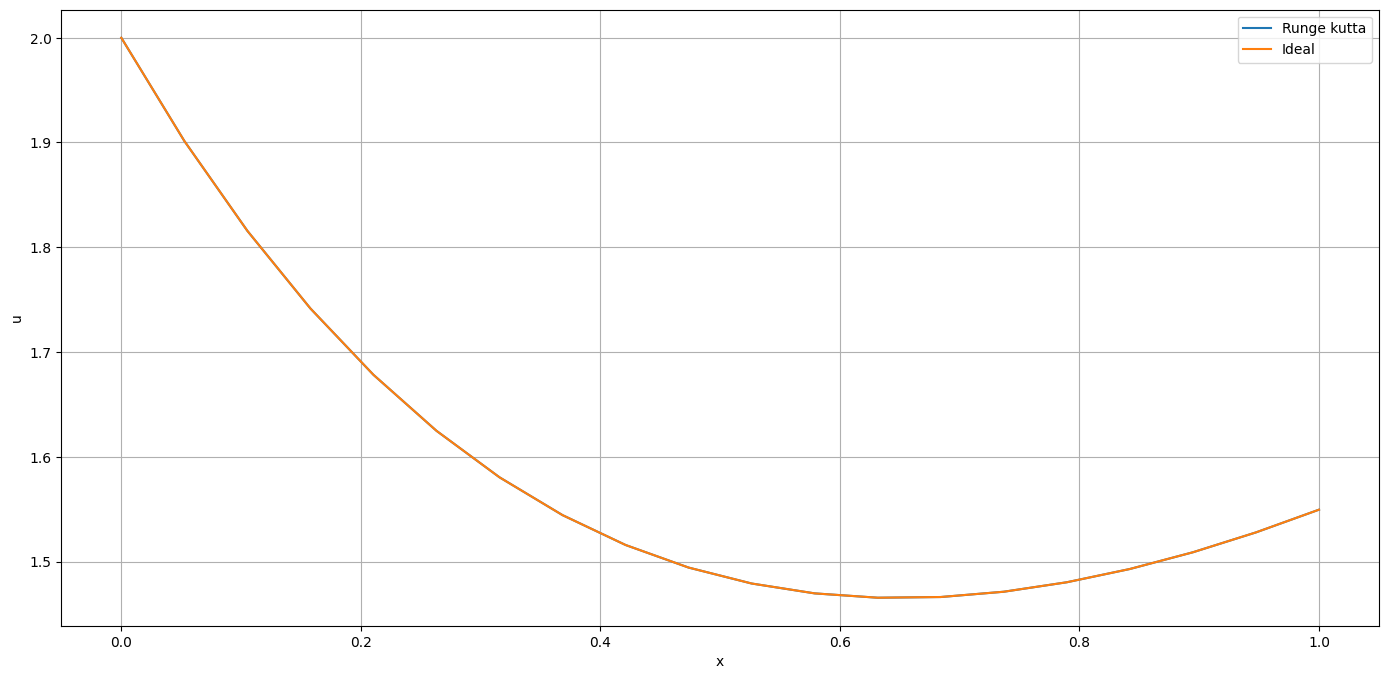

In [10]:
tester(p_x, solution_points, runge_kutta_points, "Runge kutta")

In [11]:

n1 = n // 2
p_x1 = []
for i in range(n1):
    val = a + (b - a) * i / n1
    p_x1.append(val)

runge_kutta_points2 = runge_kutta(p_x1)[0]

delta = -9999
for i in range(n1):
    delta = max(delta, abs(runge_kutta_points[2 * i] - runge_kutta_points2[i]))

deviation = delta / (2 ** 4 - 1)
deviation

0.00114620779752110

MSE: 2.201510421270884e-05, MAE: 0.0000857041729933061, MAX: 0.000122572025952117


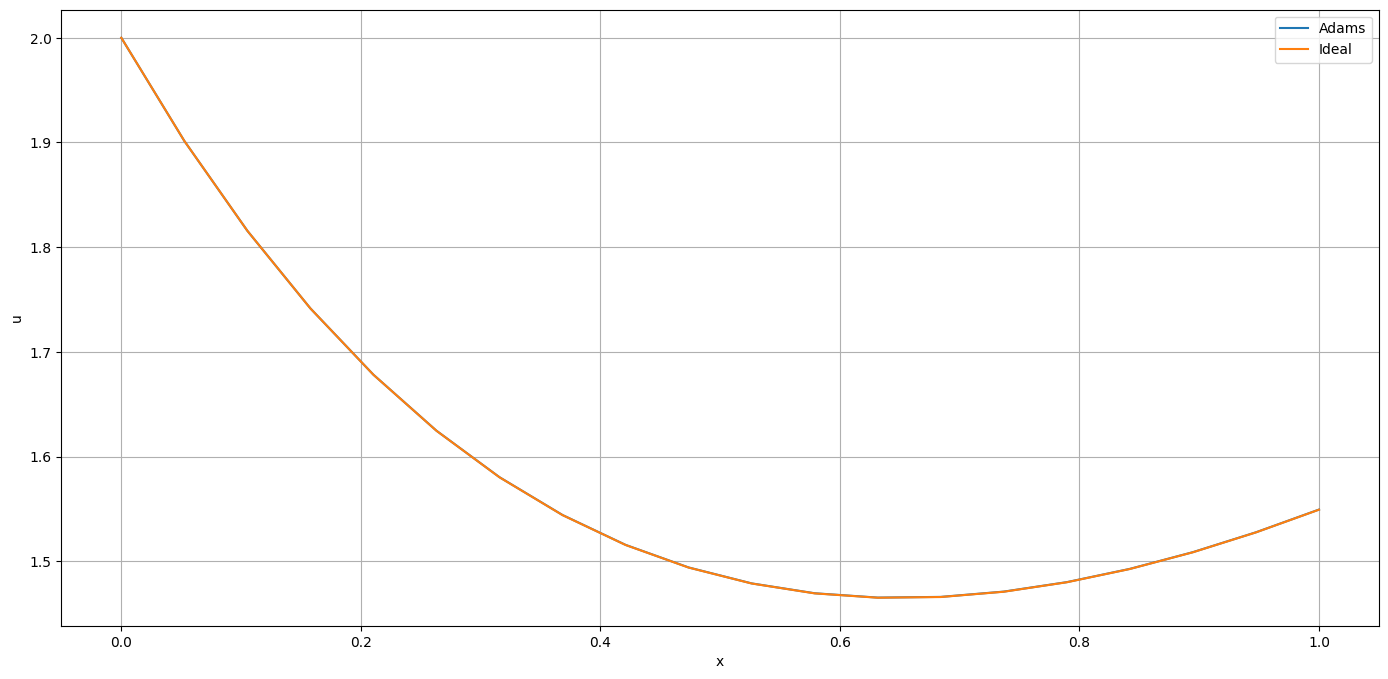

In [12]:
tester(p_x, solution_points, adams_points, "Adams")

In [13]:
n = 10
ns = []
errors = []
for i in range(1, 10):
    n = int(n * 1.4)
    p_x = [a + (b - a) * i / (n - 1) for i in range(n)]
    solution_points = [solution.subs({x: t}).evalf() for t in p_x]
    runge_points = runge_kutta(p_x)[0]
    mx = 0
    for i in range(n):
        mx = max(abs(solution_points[i] - runge_points[i]), mx)
    ns.append((b - a) / (n - 1))
    errors.append(mx)

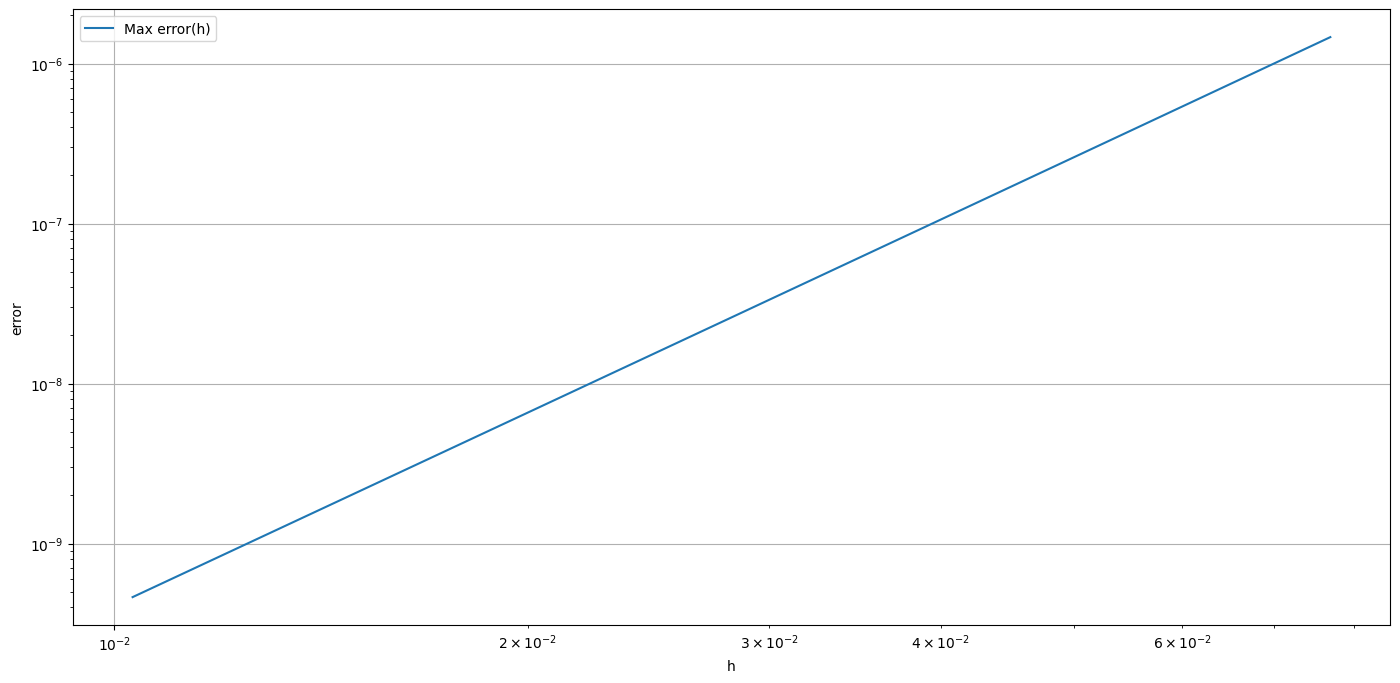

In [14]:
plt.figure(figsize=(17, 8))
plt.loglog(ns[:-2], errors[:-2], label='Max error(h)')
plt.legend()
plt.ylabel('error')
plt.xlabel('h')
plt.grid()